In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS


In [7]:
data_1 = pd.read_csv("./data/Latest_Data_Science_Salaries.csv")
data_2 = pd.read_csv("./data/v2_Latest_Data_Science_Salaries.csv")
data_3 = pd.read_csv("./data/v3_Latest_Data_Science_Salaries.csv")
data_4 = pd.read_csv("./data/v4_Latest_Data_Science_Salaries.csv")
data_5 = pd.read_csv("./data/v5_Latest_Data_Science_Salaries.csv")
data_6 = pd.read_csv("./data/v6_Latest_Data_Science_Salaries.csv")
data_7 = pd.read_csv("./data/v7_Latest_Data_Science_Salaries.csv")

data = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6, data_7], axis=0, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28668 entries, 0 to 28667
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           28668 non-null  object
 1   Employment Type     28668 non-null  object
 2   Experience Level    28668 non-null  object
 3   Expertise Level     28668 non-null  object
 4   Salary              28668 non-null  int64 
 5   Salary Currency     28668 non-null  object
 6   Company Location    28668 non-null  object
 7   Salary in USD       28668 non-null  int64 
 8   Employee Residence  28668 non-null  object
 9   Company Size        28668 non-null  object
 10  Year                28668 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.4+ MB


In [9]:
data.head(10)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
5,Data Scientist,Full-Time,Senior,Expert,126000,United States Dollar,United States,126000,United States,Medium,2023
6,Data Scientist,Full-Time,Senior,Expert,170000,United States Dollar,United States,170000,United States,Medium,2023
7,Data Scientist,Full-Time,Senior,Expert,130000,United States Dollar,United States,130000,United States,Medium,2023
8,Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
9,Data Engineer,Full-Time,Mid,Intermediate,75000,British Pound Sterling,United Kingdom,92280,United Kingdom,Medium,2023


In [14]:
data.describe()

,Salary,Salary in USD,Year
count,2.866800e+04,28668.000000,28668.000000
mean,1.955444e+05,143204.081764,2022.599344
std,6.590111e+05,69305.767784,0.683644
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,92280.000000,2022.000000
50%,1.400000e+05,136600.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,750000.000000,2024.000000


In [15]:
data.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

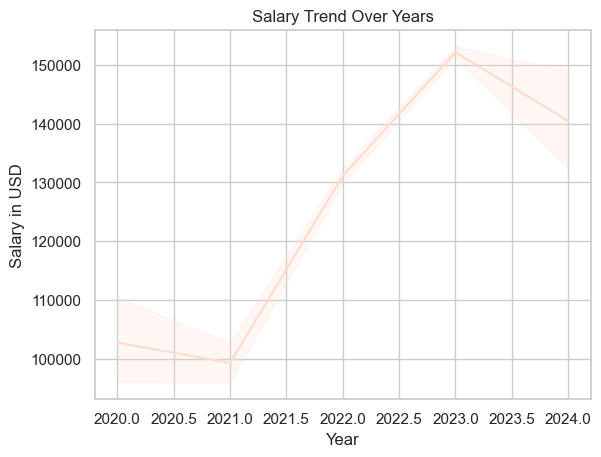

In [88]:
sns.set_theme(style="whitegrid", palette="Reds")
sns.lineplot(x="Year", y="Salary in USD", data=data)

plt.title("Salary Trend Over Years")

plt.show()

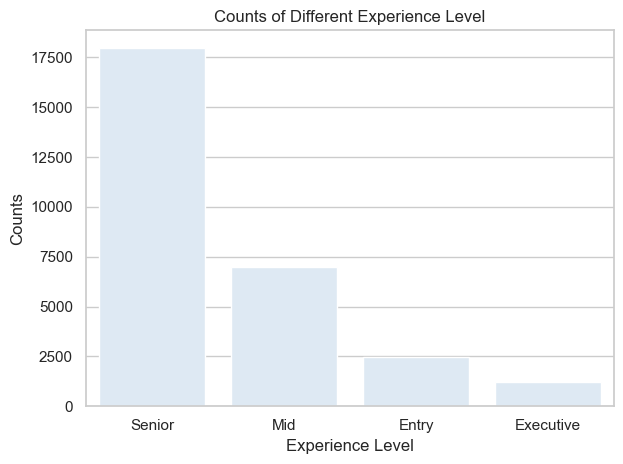

In [76]:
experience_level_counts = data["Experience Level"].value_counts()

sns.set_theme(style="whitegrid", palette="Blues")
sns.barplot(x=experience_level_counts.index, y=experience_level_counts.values)

plt.title('Counts of Different Experience Level')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()


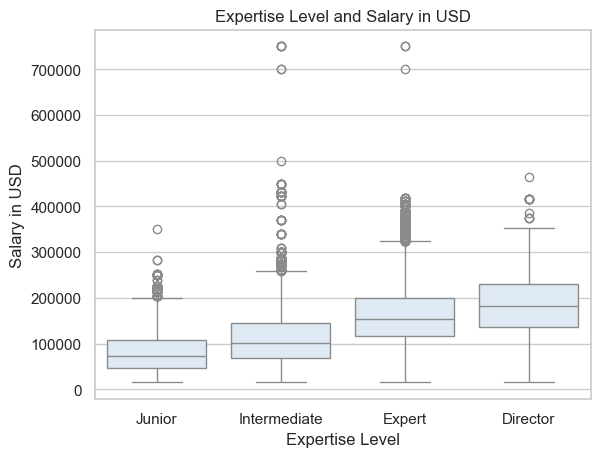

In [72]:
sns.set_theme(style="whitegrid", palette="Blues")
sns.boxplot(x="Expertise Level", y="Salary in USD", data=data,
                 order=["Junior", "Intermediate", "Expert", "Director"])

plt.title('Expertise Level and Salary in USD')

plt.show()


<Axes: xlabel='Employment Type', ylabel='Salary in USD'>

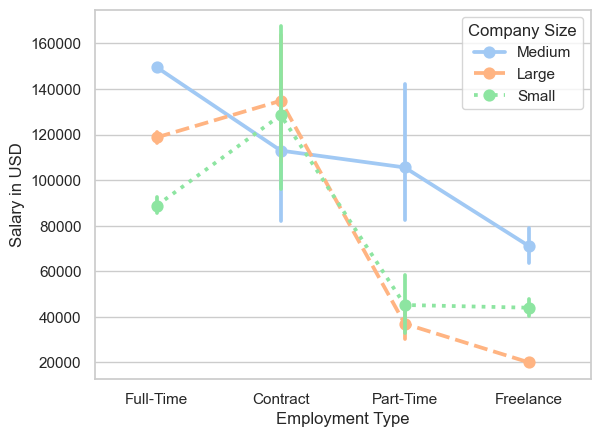

In [68]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.pointplot(data=data, x="Employment Type", y="Salary in USD", hue="Company Size",
              linestyles=["-", "--",":"])

plt.title("Salary Distribution by Employment Type and Company Size")

plt.show()

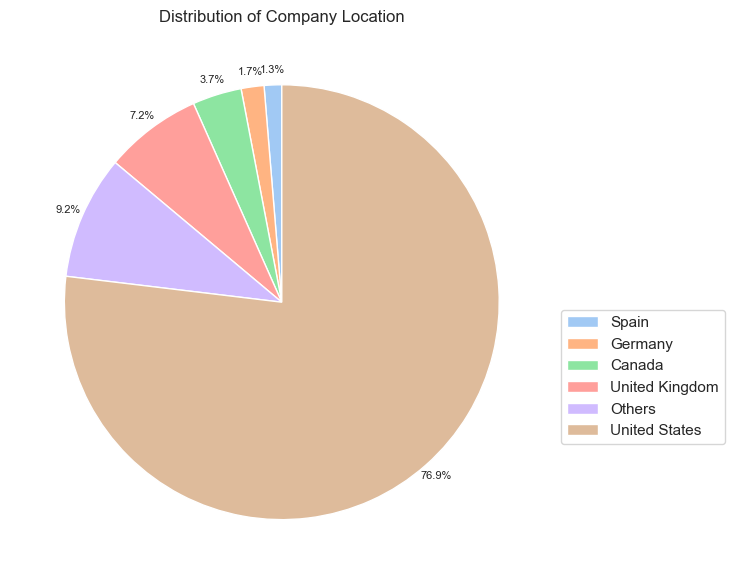

In [59]:
company_location_counts = data["Company Location"].value_counts()

company_location_labels = company_location_counts.index[:5].to_list()
company_location_values = list(company_location_counts.values[:5])

company_location_labels.append('Others')
company_location_values.append(
    sum(company_location_count 
        for company_location_count in company_location_counts.values[5:]
        )
    )

sorted_company_location = sorted(zip(company_location_values,company_location_labels), reverse=False)
company_location_values, company_location_labels = zip(*sorted_company_location)

company_location_colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 6))
plt.pie(company_location_values, labels= None, colors=company_location_colors,
        autopct='%1.1f%%',  pctdistance=1.07, startangle=90, textprops={'fontsize': 8})

plt.title('Distribution of Company Location')
plt.legend(company_location_labels, loc='best', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [83]:
pd.set_option('display.max_rows', None)
pd.pivot_table(data, index=["Company Location","Company Size"], values= 'Job Title',
               aggfunc='count').sort_values("Company Location", ascending=False)

Job Title
Company Location          Company Size           
Viet Nam                  Medium                3
United States             Small               428
                          Medium            19742
                          Large              1877
United Kingdom            Small                65
                          Medium             1840
                          Large               170
United Arab Emirates      Large                 7
                          Small                14
Ukraine                   Small                 7
                          Medium               20
Turkey                    Small                 7
                          Medium               14
                          Large                14
Thailand                  Medium                7
                          Large                14
Switzerland               Large                24
                          Small                14
Sweden                    Medium                7
                          Large                 7
                          Small                 7
Spain                     Small                14
                          Medium              303
                          Large                57
South Africa              Large                 7
                          Medium                6
Slovenia                  Medium               18
                          Large                14
Singapore                 Medium               14
                          Large                21
Saudi Arabia              Small                 7
                          Medium                7
Russian Federation        Medium               12
                          Large                29
Romania                   Large                 7
                          Medium                9
Qatar                     Medium                4
Puerto Rico               Medium               28
Portugal                  Small                14
                          Medium               74
                          Large                44
Poland                    Large                37
                          Small                 7
                          Medium                7
Philippines               Small                 7
                          Medium                4
                          Large                 7
Pakistan                  Medium               15
Norway                    Small                14
Nigeria                   Medium               21
                          Large                14
                          Small                22
New Zealand               Medium                2
                          Small                 7
Netherlands               Small                 7
                          Medium               24
                          Large                89
Moldova, Republic of      Small                 7
Mexico                    Small                21
                          Medium               42
                          Large                14
Mauritius                 Small                 2
Malta                     Large                 7
Malaysia                  Large                 7
Luxembourg                Small                 9
                          Large                 7
Lithuania                 Medium               18
Latvia                    Medium               32
Korea, Republic of        Small                10
Kenya                     Small                13
Japan                     Small                42
                          Large                14
Italy                     Small                14
                          Medium               43
                          Large                17
Israel                    Small                 7
                          Medium                7
                          Large                 7
Ireland                   Small         